In [65]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

### 1. Creating 2 bar charts to show the median salary of top 10 highest paid skills and top 10 in-demand skills

In [66]:
# Getting data for Data Analyst in the US
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)
df_DA_US_top_pay = df_DA_US_group.sort_values(by='median_salary', ascending=False).head(10)
df_DA_US_top_demand = df_DA_US_group.sort_values(by='skill_count', ascending=False).head(10)

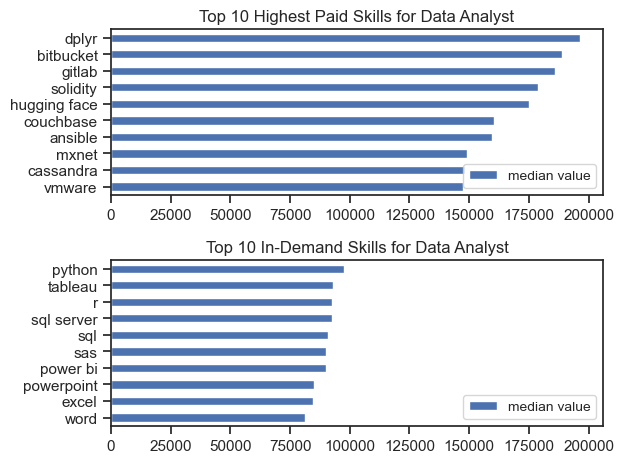

In [67]:

fig,ax = plt.subplots(2,1)

df_DA_US_top_pay.plot(kind = 'barh', y='median_salary', ax=ax[0], label = 'median value')
df_DA_US_top_demand.sort_values(by='median_salary', ascending=False).plot(kind='barh', y='median_salary',ax=ax[1], label = 'median value')

ax[0].invert_yaxis()
ax[1].invert_yaxis()

#Formatting:
# X value: set the 2nd plot to have the same x value range as 1st plot
ax[1].set_xlim(ax[0].get_xlim())

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend(loc='lower right', fontsize = 'small')  #move the legend to bottom right of the plot

ax[1].set_title('Top 10 In-Demand Skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='lower right', fontsize = 'small')  #move the legend to bottom right of the plot

fig.tight_layout()

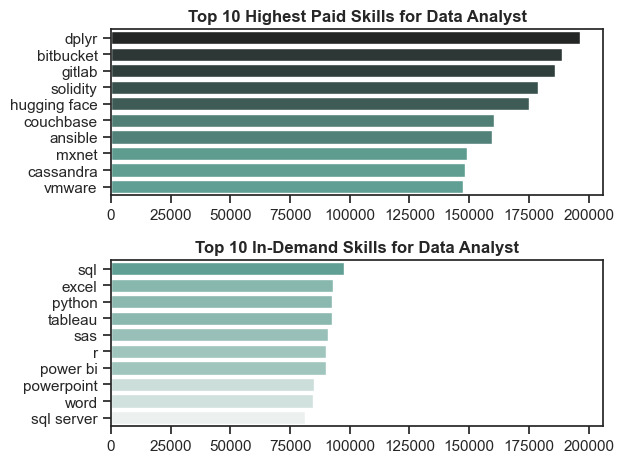

In [28]:

fig,ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

# Top paid
    #df_DA_US_top_pay.plot(kind = 'barh', y='median_salary', ax=ax[0], label = 'median value')
sns.barplot(df_DA_US_top_pay, x='median_salary', y=df_DA_US_top_pay.index, ax=ax[0], hue='median_salary', palette="dark:#5A9_r")
# Top in-demand
    #df_DA_US_top_demand.sort_values(by='median_salary', ascending=False).plot(kind='barh', y='median_salary',ax=ax[1], label = 'median value')
sns.barplot(df_DA_US_top_demand.sort_values(by=['median_salary'], ascending=False), x='median_salary', y=df_DA_US_top_demand.index, ax=ax[1],hue='median_salary',palette="light:#5A9")



#Formatting:
# X value: set the 2nd plot to have the same x value range as 1st plot
ax[1].set_xlim(ax[0].get_xlim())

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst', fontweight='bold')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove() # Remove the legend

ax[1].set_title('Top 10 In-Demand Skills for Data Analyst',fontweight='bold')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend().remove() # Remove the legend

fig.tight_layout()

## 2. Creating 2 histograms to show the salary distribution for Data Analyst in the US and Vietnam

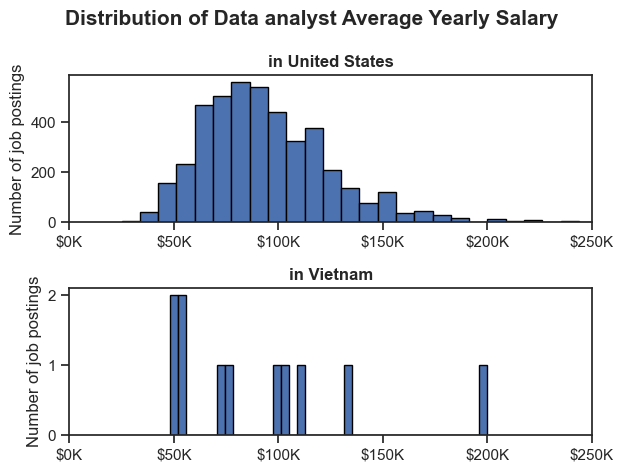

In [68]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
country_list = ['United States', 'Vietnam']

fig, ax = plt.subplots(2,1)
for i, country in enumerate(country_list):
    df_final = df_DA[df_DA['job_country']== country]
    df_final['salary_year_avg'].plot(kind = 'hist', ax=ax[i], edgecolor = 'black', bins=40)

    ax[i].set_title(f'in {country}', fontweight = 'bold')
    ax[i].set_ylabel('Number of job postings')                
    ax[i].set_xlim(0, 250_000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.suptitle('Distribution of Data analyst Average Yearly Salary', fontsize=15, fontweight = 'bold')
figsize = (10,15)
fig.tight_layout()

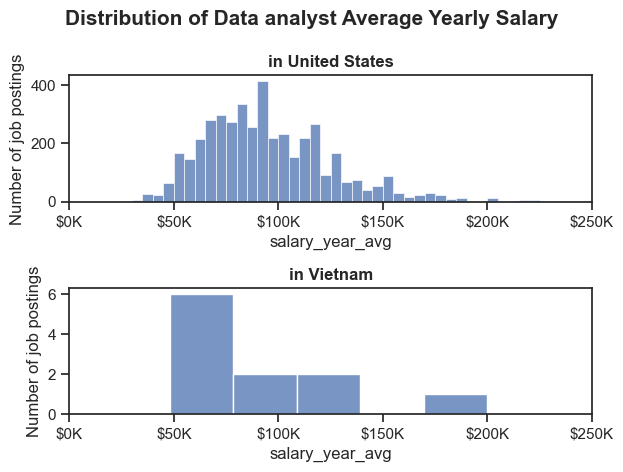

In [69]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
country_list = ['United States', 'Vietnam']

fig, ax = plt.subplots(2,1)
for i, country in enumerate(country_list):
    df_final = df_DA[df_DA['job_country']== country]
    sns.histplot(df_final['salary_year_avg'], ax=ax[i])
    # df_final['salary_year_avg'].plot(kind = 'hist', ax=ax[i], edgecolor = 'black', bins=40)

    ax[i].set_title(f'in {country}', fontweight = 'bold')
    ax[i].set_ylabel('Number of job postings')                
    ax[i].set_xlim(0, 250_000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.suptitle('Distribution of Data analyst Average Yearly Salary', fontsize=15, fontweight = 'bold')
figsize = (10,15)
fig.tight_layout()

### 2.1. Using sns.displot to show the distribution of salary in the US for data analyst jobs

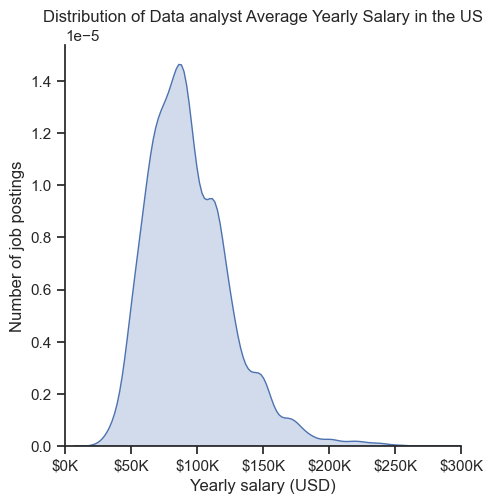

In [70]:
df_DA_US_only = df_DA[df_DA['job_country']=='United States'].copy()
sns.displot(df_DA_US_only['salary_year_avg'], kind='kde',fill=True)

sns.set_theme(style='ticks')
plt.title('Distribution of Data analyst Average Yearly Salary in the US')
plt.ylabel('Number of job postings')
plt.xlabel('Yearly salary (USD)')              
plt.xlim(0, 300_000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

## 3. Creating box plot to show the distribution of salary for 3 Data job types

In [95]:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_us_jobs = df[(df['job_country']== 'United States') & (df['job_title_short'].isin(job_titles))].copy()
df_us_jobs = df_us_jobs.dropna(subset=['salary_year_avg'])


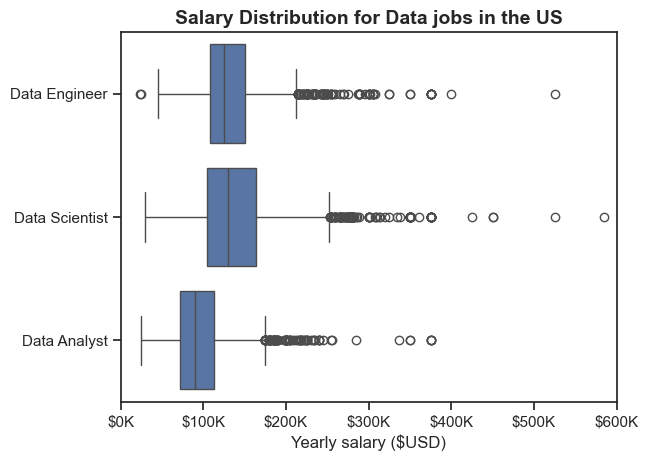

In [94]:
sns.boxplot(df_us_jobs, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution for Data jobs in the US', fontsize = 14, fontweight ='bold')
plt.xlabel('Yearly salary ($USD)')
plt.ylabel('')

# Formatting the X axis values:
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.xlim(0,600_000)
plt.show()